In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iou_zipcodes_2023.csv')

In [3]:
non_iou = pd.read_csv('non_iou_zipcodes_2023.csv')

In [4]:
df_unido = pd.concat([df, non_iou], ignore_index=True)

In [10]:
original = pd.concat([df, non_iou], ignore_index=True)

In [127]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80142 entries, 0 to 80141
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   zip           80142 non-null  int64  
 1   eiaid         80142 non-null  int64  
 2   utility_name  80142 non-null  object 
 3   state         80142 non-null  object 
 4   service_type  80142 non-null  object 
 5   ownership     80142 non-null  object 
 6   comm_rate     80142 non-null  float64
 7   ind_rate      80142 non-null  float64
 8   res_rate      80142 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 5.5+ MB


In [125]:
original.describe().T

,count,mean,std,min,25%,50%,75%,max
zip,80142.0,46478.345923,27930.852702,501.0,21650.000000,44489.000000,68133.750000,99950.000000
eiaid,80142.0,13789.508847,10685.496400,55.0,6374.000000,13573.000000,17066.000000,57483.000000
comm_rate,80142.0,0.117811,0.061944,0.0,0.085860,0.115007,0.140661,0.545686
ind_rate,80142.0,0.081564,0.059647,0.0,0.055716,0.075735,0.094791,0.404067
res_rate,80142.0,0.141357,0.069791,0.0,0.110670,0.138298,0.163971,0.644231


In [ ]:
##

In [12]:
#Normalizar as variáveis para usar o Kmeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = df_unido.select_dtypes(include=['float64']).columns
scaled_data = scaler.fit_transform(df_unido[numerical_columns])
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)
df_unido[numerical_columns] = scaled_df

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder_state = LabelEncoder()

df_unido['state'] = label_encoder_state.fit_transform(df_unido['state'] )

In [8]:
non_iou['service_type'].unique()

array(['Bundled', 'Energy', 'Delivery'], dtype=object)

In [14]:
(9 / 80133) * 100

0.011231327917337428

In [15]:
df_unido = df_unido[df_unido['service_type'] != 'Energy']
label_encoder_service = LabelEncoder()
df_unido = df_unido.copy()
df_unido['service_type'] = label_encoder_service.fit_transform(df_unido['service_type'])

<AxesSubplot:>

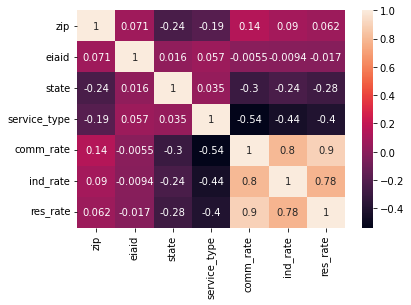

In [16]:
sns.heatmap(df_unido.corr(), annot=True)

In [17]:
label_encoder_service.classes_

array(['Bundled', 'Delivery'], dtype=object)

In [19]:
df_unido

,zip,eiaid,utility_name,state,service_type,ownership,comm_rate,ind_rate,res_rate
0,85321,176,Ajo Improvement Co,3,0,Investor Owned,-0.223070,-1.367465,-0.347778
1,36560,195,Alabama Power Co,1,0,Investor Owned,0.372985,-0.081439,0.253132
2,36513,195,Alabama Power Co,1,0,Investor Owned,0.372985,-0.081439,0.253132
3,36280,195,Alabama Power Co,1,0,Investor Owned,0.372985,-0.081439,0.253132
4,35473,195,Alabama Power Co,1,0,Investor Owned,0.372985,-0.081439,0.253132
...,...,...,...,...,...,...,...,...,...
80137,76540,55982,Heart of Texas Electric Coop,43,0,Cooperative,0.188413,0.113323,-0.237926
80138,76703,55982,Heart of Texas Electric Coop,43,0,Cooperative,0.188413,0.113323,-0.237926
80139,76702,55982,Heart of Texas Electric Coop,43,0,Cooperative,0.188413,0.113323,-0.237926
80140,76597,55982,Heart of Texas Electric Coop,43,0,Cooperative,0.188413,0.113323,-0.237926


In [21]:
#base sem valores ausentes
df_unido.isnull().sum()

zip             0
eiaid           0
utility_name    0
state           0
service_type    0
ownership       0
comm_rate       0
ind_rate        0
res_rate        0
dtype: int64

In [ ]:
##

In [23]:
scaled_df

,comm_rate,ind_rate,res_rate
0,-0.223070,-1.367465,-0.347778
1,0.372985,-0.081439,0.253132
2,0.372985,-0.081439,0.253132
3,0.372985,-0.081439,0.253132
4,0.372985,-0.081439,0.253132
...,...,...,...
80137,0.188413,0.113323,-0.237926
80138,0.188413,0.113323,-0.237926
80139,0.188413,0.113323,-0.237926
80140,0.188413,0.113323,-0.237926


In [24]:
from sklearn.cluster import KMeans

inertia = []  
k_range = range(1, 11)  

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

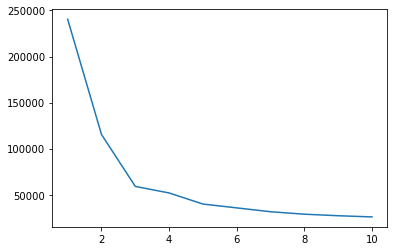

In [25]:
plt.plot(k_range, inertia)

In [26]:
#valor ideal por volta de 3
inertia

[240426.00000000244,
 115427.87511879887,
 59036.150934651094,
 51954.01738617594,
 39920.633216884016,
 35766.06749263275,
 31583.177865309655,
 28916.65035214769,
 27246.61348595801,
 25964.537432017285]

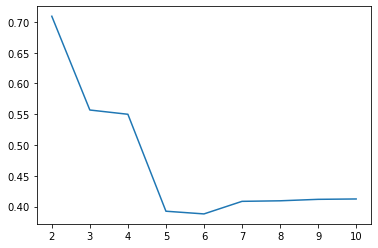

In [120]:
from sklearn.metrics import silhouette_score

silhouette = []
for k in range(2,11):
    kmeans_s = KMeans(n_clusters=k, random_state=42)
    kmeans_s.fit(scaled_df)
    score = silhouette_score(scaled_df, kmeans_s.labels_)
    silhouette.append(score)
plt.plot(range(2,11), silhouette)

In [121]:
# 3
silhouette

[0.7092286457224938,
 0.5568458570880571,
 0.5499284132548176,
 0.39238590112738925,
 0.3879934835874497,
 0.40842004260513665,
 0.4093100943331683,
 0.41168636963880834,
 0.41228484671033566]

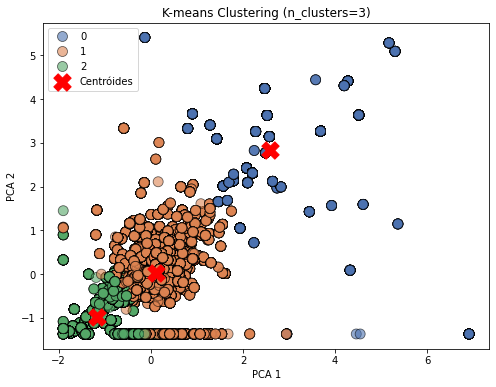

In [27]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state = 42)
kmeans.fit(scaled_df)  

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

pca = PCA(n_components=2)
z_pca = pca.fit_transform(scaled_df)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_df.iloc[:, 0], y=scaled_df.iloc[:, 1], hue=labels, palette="deep", s=100, alpha=0.6, edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centróides')

plt.title(f'K-means Clustering (n_clusters={n_clusters})')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()

plt.show()

In [128]:
from sklearn.metrics import silhouette_score

silhouette_avg_k = silhouette_score(scaled_df, kmeans.labels_)
print("Silhouette Score:", silhouette_avg_k)

Silhouette Score: 0.5568458570880571


In [28]:
ROTULOS = pd.DataFrame(data=labels)
df_unido['rotulos'] = ROTULOS
GRUPOS = df_unido.groupby('rotulos')
GRUPOS.mean()

,zip,eiaid,state,service_type,comm_rate,ind_rate,res_rate
rotulos,,,,,,,
0,50765.332062,14024.631063,13.758583,0.000000,2.578227,2.825116,2.532617
1,48437.978904,13413.403998,24.995283,0.078439,0.111377,0.031091,0.109210
2,38765.731750,14939.178038,30.243140,0.753451,-1.166810,-0.984236,-1.144779


In [29]:
#Cluster 1 parece ser um grupo intermediário, com taxas médias de energia.
#Cluster 2 representa áreas com menores taxas de energia, talvez região com menor demanda
#Cluster 0 representa áreas com altas taxas de energia, o que pode estar relacionado com áreas mais urbanizadas

In [59]:
data_sample = scaled_df.sample(frac=0.1, random_state=42)

In [30]:
# Contagem de clusters por tipo de serviço
tipo_servico_cluster_count = df_unido.groupby(['service_type', 'rotulos']).size().unstack(fill_value=0)
tipo_servico_cluster_count

rotulos,0,1,2
service_type,,,
0,5505,52552,4340
1,0,4473,13263


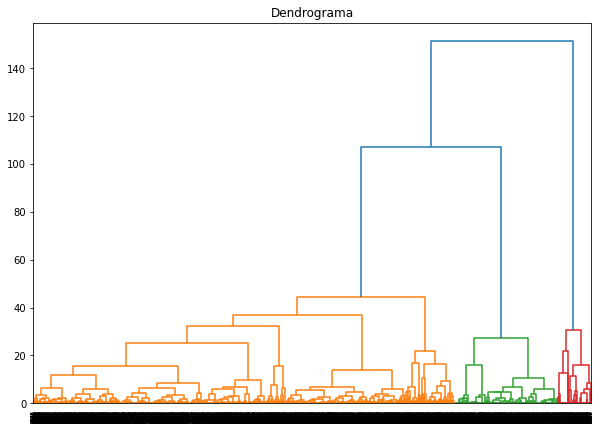

In [60]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(data_sample , method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending')
plt.title('Dendrograma')
plt.show()

In [61]:
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')

agg_clustering.fit(data_sample)

labels = agg_clustering.labels_
print("Rótulos dos clusters:", labels)

Rótulos dos clusters: [2 2 0 ... 0 0 0]


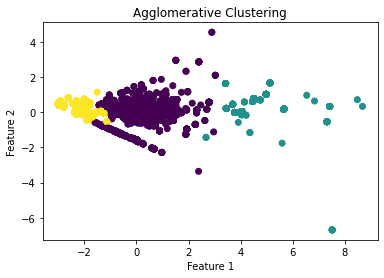

In [62]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_sample) 

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [146]:
silhouette_avg = silhouette_score(data_sample, agg_clustering.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5630220093817456


In [31]:
label_encoder_service.classes_

array(['Bundled', 'Delivery'], dtype=object)

In [32]:
cluster_aliases = {
    0: 'Taxas Altas',
    1: 'Taxas Médias',
    2: 'Taxas Baixas'
}

In [33]:
services_aliases = {
    0: 'Bundled',
    1: 'Delivery'
}

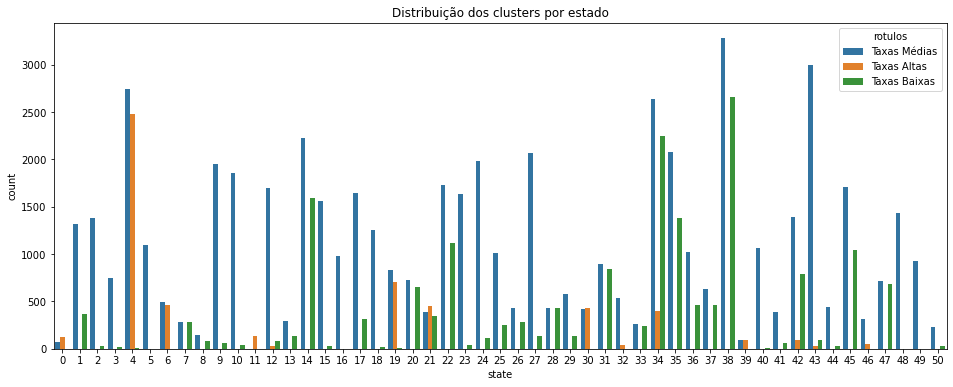

In [34]:
# Gráfico de barras mostrando a distribuição dos clusters por estado
plt.figure(figsize=(16, 6))
sns.countplot(x='state', hue=df_unido['rotulos'].map(cluster_aliases), data=df_unido)
plt.title('Distribuição dos clusters por estado')
plt.show()

In [199]:
label_encoder_state.classes_

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

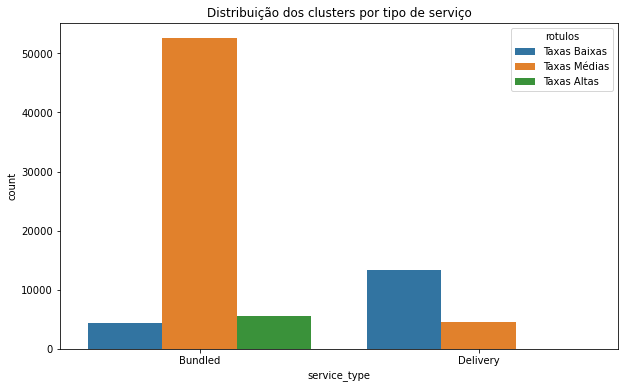

In [35]:
# Gráfico de barras mostrando a distribuição dos clusters por tipo de serviço
plt.figure(figsize=(10, 6))
sns.countplot(x=df_unido['service_type'].map(services_aliases),hue=df_unido['rotulos'].map(cluster_aliases), data=df_unido)
plt.title('Distribuição dos clusters por tipo de serviço')
plt.show()

In [ ]:
#delivery não tem taxas altas e possui mais taxas baixas

In [36]:
df_unido

,zip,eiaid,utility_name,state,service_type,ownership,comm_rate,ind_rate,res_rate,rotulos
0,85321,176,Ajo Improvement Co,3,0,Investor Owned,-0.223070,-1.367465,-0.347778,2
1,36560,195,Alabama Power Co,1,0,Investor Owned,0.372985,-0.081439,0.253132,1
2,36513,195,Alabama Power Co,1,0,Investor Owned,0.372985,-0.081439,0.253132,1
3,36280,195,Alabama Power Co,1,0,Investor Owned,0.372985,-0.081439,0.253132,1
4,35473,195,Alabama Power Co,1,0,Investor Owned,0.372985,-0.081439,0.253132,1
...,...,...,...,...,...,...,...,...,...,...
80137,76540,55982,Heart of Texas Electric Coop,43,0,Cooperative,0.188413,0.113323,-0.237926,1
80138,76703,55982,Heart of Texas Electric Coop,43,0,Cooperative,0.188413,0.113323,-0.237926,1
80139,76702,55982,Heart of Texas Electric Coop,43,0,Cooperative,0.188413,0.113323,-0.237926,1
80140,76597,55982,Heart of Texas Electric Coop,43,0,Cooperative,0.188413,0.113323,-0.237926,1


In [20]:
#soma dos valores de outros
3515 + 1836 + 1578+528+256

7713

In [37]:
 #quase 10% somente
(7713 / 80142) * 100

9.62416710339148

In [38]:
categorias_menores = ['Federal', 'Political Subdivision', 'State', 'Retail Power Marketer', 'Municipal']
df_unido['ownership'] = df_unido['ownership'].replace(categorias_menores, 'Others')

print(df_unido['ownership'].value_counts())

Investor Owned    52074
Cooperative       20355
Others             7704
Name: ownership, dtype: int64


In [39]:
label_encoder_own = LabelEncoder()
df_unido['ownership'] = label_encoder_own.fit_transform(df_unido['ownership'])

In [40]:
df_unido

,zip,eiaid,utility_name,state,service_type,ownership,comm_rate,ind_rate,res_rate,rotulos
0,85321,176,Ajo Improvement Co,3,0,1,-0.223070,-1.367465,-0.347778,2
1,36560,195,Alabama Power Co,1,0,1,0.372985,-0.081439,0.253132,1
2,36513,195,Alabama Power Co,1,0,1,0.372985,-0.081439,0.253132,1
3,36280,195,Alabama Power Co,1,0,1,0.372985,-0.081439,0.253132,1
4,35473,195,Alabama Power Co,1,0,1,0.372985,-0.081439,0.253132,1
...,...,...,...,...,...,...,...,...,...,...
80137,76540,55982,Heart of Texas Electric Coop,43,0,0,0.188413,0.113323,-0.237926,1
80138,76703,55982,Heart of Texas Electric Coop,43,0,0,0.188413,0.113323,-0.237926,1
80139,76702,55982,Heart of Texas Electric Coop,43,0,0,0.188413,0.113323,-0.237926,1
80140,76597,55982,Heart of Texas Electric Coop,43,0,0,0.188413,0.113323,-0.237926,1


In [41]:
label_encoder_own.classes_

array(['Cooperative', 'Investor Owned', 'Others'], dtype=object)

In [42]:
own_aliases = {
    0: 'Cooperative',
    1: 'Investor Owned',
    2: 'Others'
}

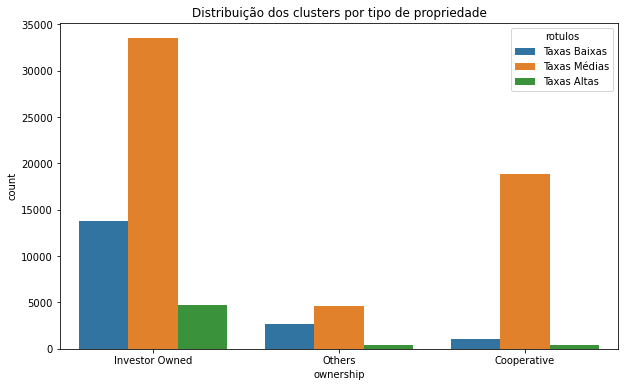

In [200]:
# Gráfico de barras mostrando a distribuição dos clusters por tipo de propriedade
plt.figure(figsize=(10, 6))
sns.countplot(x=df_unido['ownership'].map(own_aliases),hue=df_unido['rotulos'].map(cluster_aliases), data=df_unido)
plt.title('Distribuição dos clusters por tipo de propriedade')
plt.show()


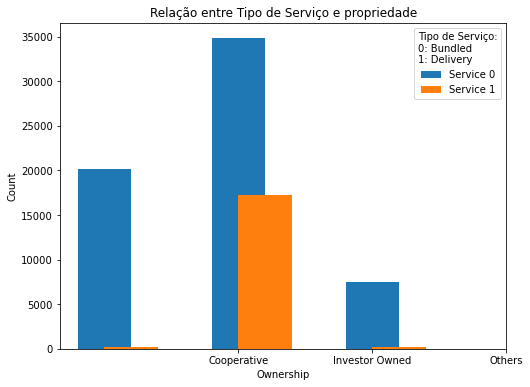

In [204]:
contagem = df_unido.groupby(['service_type', 'ownership']).size().reset_index(name='count')


fig, ax = plt.subplots(figsize=(8, 6))
for service in [0, 1]:
    service_data = contagem[contagem['service_type'] == service]
    ax.bar(service_data['ownership'] + service * 0.2, service_data['count'], width=0.4, label=f'Service {service}')

ax.set_xlabel('Ownership')
ax.set_ylabel('Count')
ax.set_title('Relação entre Tipo de Serviço e propriedade')
ax.set_xticks([1, 2, 3])
ax.set_xticklabels([own_aliases[0], own_aliases[1], own_aliases[2]])
ax.legend(title='Tipo de Serviço:\n0: Bundled \n1: Delivery')
plt.show()

In [203]:
label_encoder_service.classes_

array(['Bundled', 'Delivery'], dtype=object)

In [138]:
df_unido['utility_name'].nunique()

1202

In [45]:
label_encoder_utility = LabelEncoder()
df_unido['utility_name'] = label_encoder_utility.fit_transform(df_unido['utility_name'])

In [46]:
df_unido

,zip,eiaid,utility_name,state,service_type,ownership,comm_rate,ind_rate,res_rate,rotulos
0,85321,176,9,3,0,1,-0.223070,-1.367465,-0.347778,2
1,36560,195,11,1,0,1,0.372985,-0.081439,0.253132,1
2,36513,195,11,1,0,1,0.372985,-0.081439,0.253132,1
3,36280,195,11,1,0,1,0.372985,-0.081439,0.253132,1
4,35473,195,11,1,0,1,0.372985,-0.081439,0.253132,1
...,...,...,...,...,...,...,...,...,...,...
80137,76540,55982,645,43,0,0,0.188413,0.113323,-0.237926,1
80138,76703,55982,645,43,0,0,0.188413,0.113323,-0.237926,1
80139,76702,55982,645,43,0,0,0.188413,0.113323,-0.237926,1
80140,76597,55982,645,43,0,0,0.188413,0.113323,-0.237926,1


<AxesSubplot:>

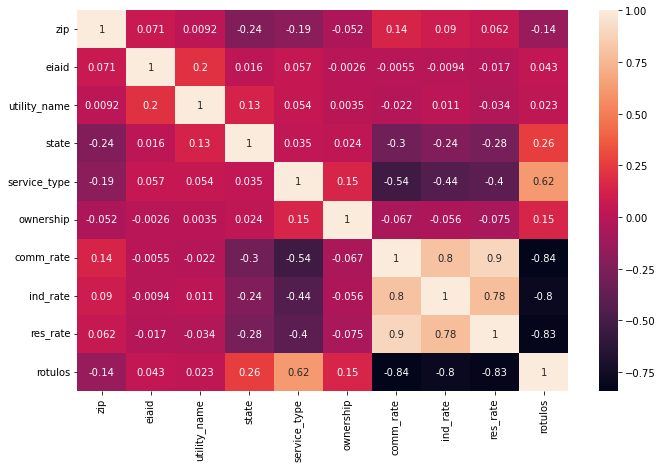

In [205]:
plt.figure(figsize=(11, 7))
sns.heatmap(df_unido.corr(), annot=True)

In [ ]:
####

In [48]:
df_unido.corr()

,zip,eiaid,utility_name,state,service_type,ownership,comm_rate,ind_rate,res_rate,rotulos
zip,1.000000,0.070564,0.009232,-0.239375,-0.191192,-0.052322,0.143074,0.090148,0.061834,-0.138126
eiaid,0.070564,1.000000,0.204703,0.015519,0.057096,-0.002553,-0.005498,-0.009434,-0.017490,0.042900
utility_name,0.009232,0.204703,1.000000,0.129914,0.054406,0.003529,-0.021528,0.011489,-0.033668,0.023332
state,-0.239375,0.015519,0.129914,1.000000,0.035344,0.023972,-0.302671,-0.238924,-0.281707,0.257969
service_type,-0.191192,0.057096,0.054406,0.035344,1.000000,0.148699,-0.537771,-0.443559,-0.399718,0.617446
ownership,-0.052322,-0.002553,0.003529,0.023972,0.148699,1.000000,-0.067333,-0.056391,-0.074717,0.150143
comm_rate,0.143074,-0.005498,-0.021528,-0.302671,-0.537771,-0.067333,1.000000,0.800572,0.895421,-0.841050
ind_rate,0.090148,-0.009434,0.011489,-0.238924,-0.443559,-0.056391,0.800572,1.000000,0.778533,-0.796105
res_rate,0.061834,-0.017490,-0.033668,-0.281707,-0.399718,-0.074717,0.895421,0.778533,1.000000,-0.825803
rotulos,-0.138126,0.042900,0.023332,0.257969,0.617446,0.150143,-0.841050,-0.796105,-0.825803,1.000000


In [129]:
df_unido

,zip,eiaid,utility_name,state,service_type,ownership,comm_rate,ind_rate,res_rate,rotulos
0,85321,176,9,3,0,1,-0.223070,-1.367465,-0.347778,2
1,36560,195,11,1,0,1,0.372985,-0.081439,0.253132,1
2,36513,195,11,1,0,1,0.372985,-0.081439,0.253132,1
3,36280,195,11,1,0,1,0.372985,-0.081439,0.253132,1
4,35473,195,11,1,0,1,0.372985,-0.081439,0.253132,1
...,...,...,...,...,...,...,...,...,...,...
80137,76540,55982,645,43,0,0,0.188413,0.113323,-0.237926,1
80138,76703,55982,645,43,0,0,0.188413,0.113323,-0.237926,1
80139,76702,55982,645,43,0,0,0.188413,0.113323,-0.237926,1
80140,76597,55982,645,43,0,0,0.188413,0.113323,-0.237926,1


In [49]:
df_onehot = df_unido.copy()

In [50]:
label_encoder_service.classes_

array(['Bundled', 'Delivery'], dtype=object)

In [51]:
df_onehot['service_type'] = label_encoder_service.inverse_transform(df_onehot['service_type'])

In [52]:
df_onehot

,zip,eiaid,utility_name,state,service_type,ownership,comm_rate,ind_rate,res_rate,rotulos
0,85321,176,9,3,Bundled,1,-0.223070,-1.367465,-0.347778,2
1,36560,195,11,1,Bundled,1,0.372985,-0.081439,0.253132,1
2,36513,195,11,1,Bundled,1,0.372985,-0.081439,0.253132,1
3,36280,195,11,1,Bundled,1,0.372985,-0.081439,0.253132,1
4,35473,195,11,1,Bundled,1,0.372985,-0.081439,0.253132,1
...,...,...,...,...,...,...,...,...,...,...
80137,76540,55982,645,43,Bundled,0,0.188413,0.113323,-0.237926,1
80138,76703,55982,645,43,Bundled,0,0.188413,0.113323,-0.237926,1
80139,76702,55982,645,43,Bundled,0,0.188413,0.113323,-0.237926,1
80140,76597,55982,645,43,Bundled,0,0.188413,0.113323,-0.237926,1


In [53]:
df_onehot = pd.get_dummies(df_onehot, columns=['service_type'])

In [54]:
df_onehot

,zip,eiaid,utility_name,state,ownership,comm_rate,ind_rate,res_rate,rotulos,service_type_Bundled,service_type_Delivery
0,85321,176,9,3,1,-0.223070,-1.367465,-0.347778,2,1,0
1,36560,195,11,1,1,0.372985,-0.081439,0.253132,1,1,0
2,36513,195,11,1,1,0.372985,-0.081439,0.253132,1,1,0
3,36280,195,11,1,1,0.372985,-0.081439,0.253132,1,1,0
4,35473,195,11,1,1,0.372985,-0.081439,0.253132,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
80137,76540,55982,645,43,0,0.188413,0.113323,-0.237926,1,1,0
80138,76703,55982,645,43,0,0.188413,0.113323,-0.237926,1,1,0
80139,76702,55982,645,43,0,0.188413,0.113323,-0.237926,1,1,0
80140,76597,55982,645,43,0,0.188413,0.113323,-0.237926,1,1,0


<AxesSubplot:>

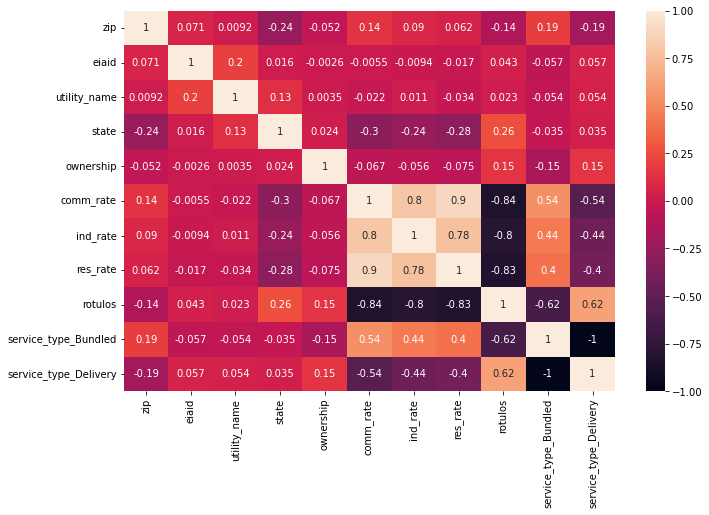

In [55]:
plt.figure(figsize=(11, 7))
sns.heatmap(df_onehot.corr(), annot=True)

In [56]:
df_onehot.corr()

,zip,eiaid,utility_name,state,ownership,comm_rate,ind_rate,res_rate,rotulos,service_type_Bundled,service_type_Delivery
zip,1.000000,0.070564,0.009232,-0.239375,-0.052322,0.143074,0.090148,0.061834,-0.138126,0.191192,-0.191192
eiaid,0.070564,1.000000,0.204703,0.015519,-0.002553,-0.005498,-0.009434,-0.017490,0.042900,-0.057096,0.057096
utility_name,0.009232,0.204703,1.000000,0.129914,0.003529,-0.021528,0.011489,-0.033668,0.023332,-0.054406,0.054406
state,-0.239375,0.015519,0.129914,1.000000,0.023972,-0.302671,-0.238924,-0.281707,0.257969,-0.035344,0.035344
ownership,-0.052322,-0.002553,0.003529,0.023972,1.000000,-0.067333,-0.056391,-0.074717,0.150143,-0.148699,0.148699
comm_rate,0.143074,-0.005498,-0.021528,-0.302671,-0.067333,1.000000,0.800572,0.895421,-0.841050,0.537771,-0.537771
ind_rate,0.090148,-0.009434,0.011489,-0.238924,-0.056391,0.800572,1.000000,0.778533,-0.796105,0.443559,-0.443559
res_rate,0.061834,-0.017490,-0.033668,-0.281707,-0.074717,0.895421,0.778533,1.000000,-0.825803,0.399718,-0.399718
rotulos,-0.138126,0.042900,0.023332,0.257969,0.150143,-0.841050,-0.796105,-0.825803,1.000000,-0.617446,0.617446
service_type_Bundled,0.191192,-0.057096,-0.054406,-0.035344,-0.148699,0.537771,0.443559,0.399718,-0.617446,1.000000,-1.000000


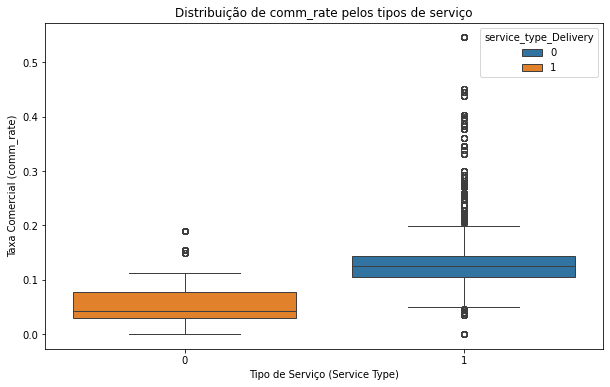

In [145]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='service_type_Bundled', y='comm_rate', data=df_onehot, hue='service_type_Delivery')

plt.title('Distribuição de comm_rate pelos tipos de serviço')
plt.xlabel('Tipo de Serviço (Service Type)')
plt.ylabel('Taxa Comercial (comm_rate)')
plt.show()

In [58]:
#Quando serviço é do tipo Bundled, taxas tendem a ser maiores

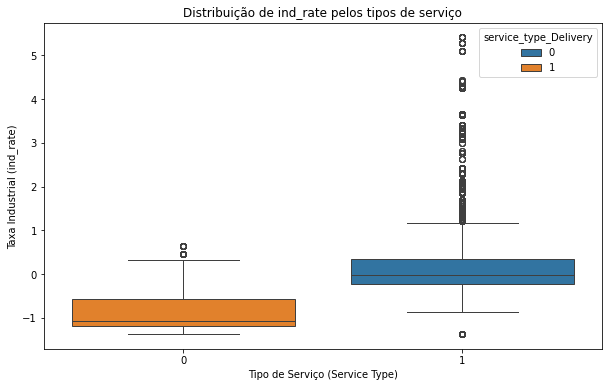

In [141]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='service_type_Bundled', y='ind_rate', data=df_onehot, hue='service_type_Delivery')

plt.title('Distribuição de ind_rate pelos tipos de serviço')
plt.xlabel('Tipo de Serviço (Service Type)')
plt.ylabel('Taxa Industrial (ind_rate)')
plt.show()

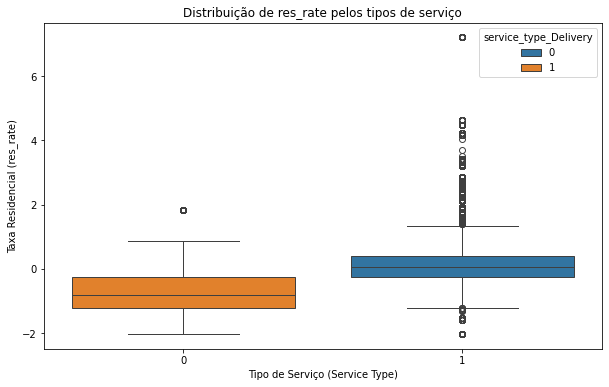

In [143]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='service_type_Bundled', y='res_rate', data=df_onehot, hue='service_type_Delivery')

plt.title('Distribuição de res_rate pelos tipos de serviço')
plt.xlabel('Tipo de Serviço (Service Type)')
plt.ylabel('Taxa Residencial (res_rate)')
plt.show()

Text(0, 0.5, 'Frequência')

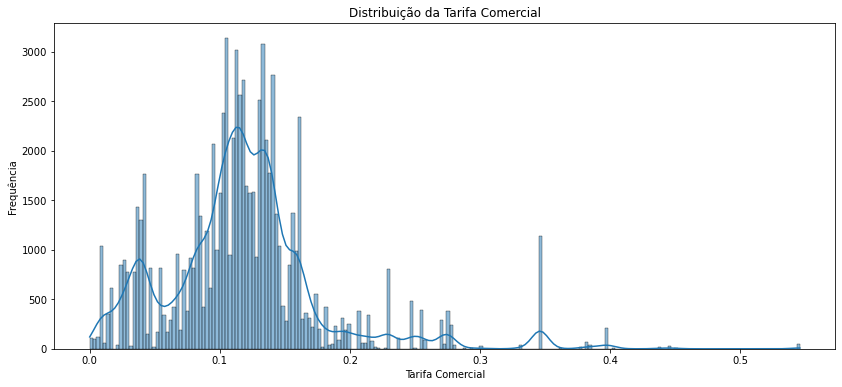

In [179]:
plt.figure(figsize=(14,6))
sns.histplot(df_onehot, x='comm_rate',kde=True)

plt.title('Distribuição da Tarifa Comercial')
plt.xlabel('Tarifa Comercial')
plt.ylabel('Frequência')

In [178]:
from scipy.stats import skew, kurtosis

skewness = skew(df_onehot['comm_rate'])
print(f'Assimetria: {skewness}')

kurt = kurtosis(df_onehot['comm_rate'])
print(f'Curtose: {kurt}')

Assimetria: 1.4760232917488436
Curtose: 5.098389014012152


Distribuição assimétrica à direita.
Distribuição leptocúrtica (caudas pesadas).

Text(0, 0.5, 'Frequência')

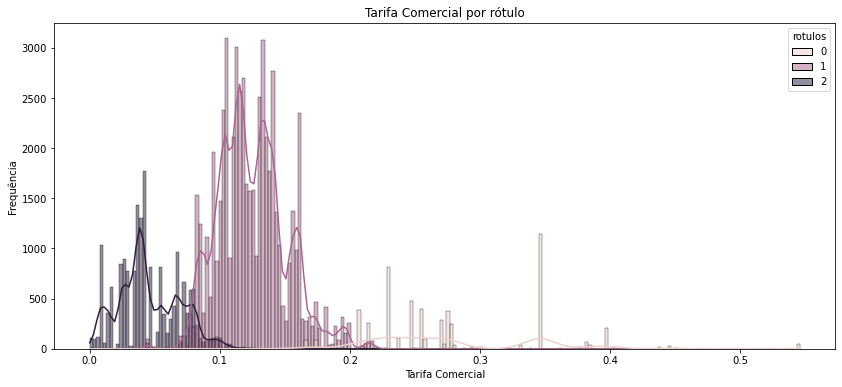

In [175]:
plt.figure(figsize=(14,6))
sns.histplot(df_onehot, x='comm_rate', hue='rotulos', kde=True)

plt.title('Tarifa Comercial por rótulo')
plt.xlabel('Tarifa Comercial')
plt.ylabel('Frequência')

In [180]:
cluster_aliases

{0: 'Taxas Altas', 1: 'Taxas Médias', 2: 'Taxas Baixas'}

Text(0, 0.5, 'Frequência')

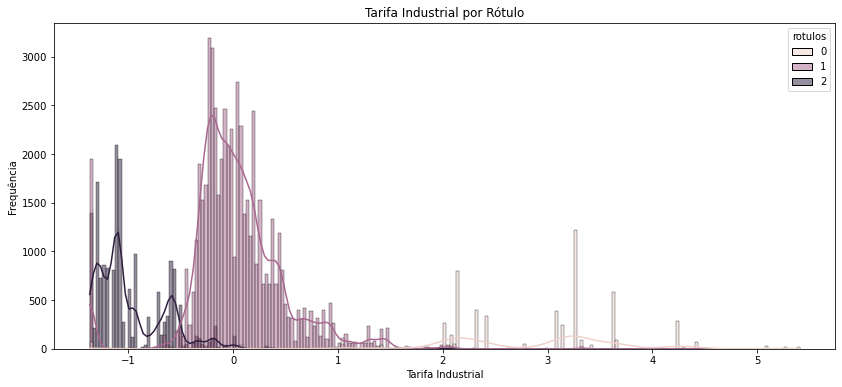

In [181]:
plt.figure(figsize=(14,6))
sns.histplot(df_onehot, x='ind_rate', hue='rotulos', kde=True)

plt.title('Tarifa Industrial por Rótulo')
plt.xlabel('Tarifa Industrial')
plt.ylabel('Frequência')

Text(0, 0.5, 'Frequência')

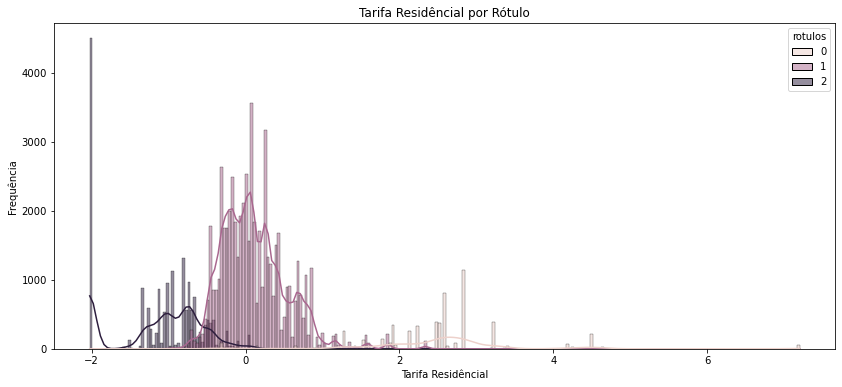

In [170]:
plt.figure(figsize=(14,6))
sns.histplot(df_onehot, x='res_rate', hue='rotulos', kde=True)

plt.title('Tarifa Residêncial por Rótulo')
plt.xlabel('Tarifa Residêncial')
plt.ylabel('Frequência')

In [ ]:
df_onehot

In [ ]:
###

In [64]:
df_onehot['comm_rate'] = original['comm_rate']

In [65]:
df_onehot

,zip,eiaid,utility_name,state,ownership,comm_rate,ind_rate,res_rate,rotulos,service_type_Bundled,service_type_Delivery
0,85321,176,9,3,1,0.103993,-1.367465,-0.347778,2,1,0
1,36560,195,11,1,1,0.140915,-0.081439,0.253132,1,1,0
2,36513,195,11,1,1,0.140915,-0.081439,0.253132,1,1,0
3,36280,195,11,1,1,0.140915,-0.081439,0.253132,1,1,0
4,35473,195,11,1,1,0.140915,-0.081439,0.253132,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
80137,76540,55982,645,43,0,0.129482,0.113323,-0.237926,1,1,0
80138,76703,55982,645,43,0,0.129482,0.113323,-0.237926,1,1,0
80139,76702,55982,645,43,0,0.129482,0.113323,-0.237926,1,1,0
80140,76597,55982,645,43,0,0.129482,0.113323,-0.237926,1,1,0


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
import time

X = df_onehot
y = df_onehot['comm_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
start_time = time.time()
model = RandomForestRegressor(n_estimators=100, random_state=42) 
model.fit(X_train, y_train) 

y_pred = model.predict(X_test)

end_time = time.time()  
execution_time = end_time - start_time 
print(f'Tempo de execução da Floresta Aleatória - Hold Out: {execution_time:.4f} segundos\n')

mae = mean_absolute_error(y_test, y_pred)  # Erro médio absoluto
r2 = r2_score(y_test, y_pred)  # R²


print(f"Erro Médio Absoluto (MAE): {mae:.10f}\n")
print(f"R²: {r2}\n")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.10f}")

Tempo de execução da Floresta Aleatória - Hold Out: 7.3718 segundos

Erro Médio Absoluto (MAE): 0.0000012777

R²: 0.9999988380556422

RMSE: 0.0000668215


In [67]:
np.max(y)

0.5456855401336564

In [68]:
np.mean(y)

0.11781474318018119

In [69]:
np.min(y)

0.0

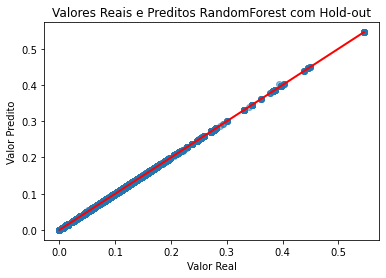

In [70]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2) 
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.title('Valores Reais e Preditos RandomForest com Hold-out')
plt.show()

In [71]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

forestModel = RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=10, random_state=42) 

X_rf = df_onehot.drop('comm_rate', axis=1).values  
y_rf = df_onehot['comm_rate'].values  

kf = KFold(n_splits=10, shuffle=True, random_state=42)

mse_rf = []
r2_rf = []

start_time = time.time()
for train_index, test_index in kf.split(X_rf):
    X_train, X_test = X_rf[train_index], X_rf[test_index]
    y_train, y_test = y_rf[train_index], y_rf[test_index]

    forestModel.fit(X_train, y_train)
    y_pred = forestModel.predict(X_test)
    
    r2_f = r2_score(y_test, y_pred)
    mse_f = mean_squared_error(y_test, y_pred)
    mse_rf.append(mse_f)
    r2_rf.append(r2_f)
    
end_time = time.time()  
execution_time = end_time - start_time 
print(f'Tempo de execução da Floresta Aleatória - Kfold: {execution_time:.4f} segundos')

Tempo de execução da Floresta Aleatória - Kfold: 36.9645 segundos


In [72]:
print('------Random Forest Regressor--------\n')
mean_mse_rf = np.mean(mse_rf)
print(f'Erro Médio Quadrático (MSE) de validação cruzada: {mean_mse_rf:.10f} \n')

mean_r2_rf = np.mean(r2_rf)
print(f'R2 médio da validação cruzada: {mean_r2_rf:.10f}\n')

print(f'Erros de cada fold: {mse_rf}\n')
print(f'R2 de cada fold: {r2_rf}\n')

------Random Forest Regressor--------

Erro Médio Quadrático (MSE) de validação cruzada: 0.0000602219 

R2 médio da validação cruzada: 0.9842949705

Erros de cada fold: [6.0310341389007196e-05, 5.7760383952724014e-05, 6.436674273840683e-05, 5.6812332240115e-05, 5.764133237795775e-05, 5.690948130259213e-05, 6.46059510149902e-05, 6.007958073401955e-05, 6.57038417619323e-05, 5.8029186481375524e-05]

R2 de cada fold: [0.9845858894446506, 0.9845227471325941, 0.9834254256586084, 0.9856729165758601, 0.9849743659686493, 0.9853952597965974, 0.9829203680094043, 0.9842944068868537, 0.9825380758700505, 0.9846202496168291]



In [118]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')

X_svr = df_onehot.drop('comm_rate', axis=1).values  
y_svr = df_onehot['comm_rate'].values  

kf = KFold(n_splits=10, shuffle=True, random_state=42)

mse_svr = []
r2_svr = []
start_time = time.time()
for train_index, test_index in kf.split(X_svr):
    X_train, X_test = X_svr[train_index], X_svr[test_index]
    y_train, y_test = y_svr[train_index], y_svr[test_index]

    svr_model.fit(X_train, y_train)
    y_pred = svr_model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse_s = mean_squared_error(y_test, y_pred)
    mse_svr.append(mse_s)
    r2_svr.append(r2)
    
end_time = time.time()  
execution_time = end_time - start_time 
print(f'Tempo de execução da SVM Regressor: {execution_time:.4f} segundos')

Tempo de execução da SVM Regressor: 1059.0209 segundos


17,6 minutos

In [119]:
print('------SVR--------\n')

mean_cv_error_svr = np.mean(mse_svr)
print(f'Erro Médio Quadrático Médio (MSE): {mean_cv_error_svr} \n')

mean_r2_svr = np.mean(r2_svr)
print(f'R2 médio da validação cruzada: {mean_r2_svr}\n')

print(f'Erros de cada fold: {mse_svr}\n')
print(f'R2 de cada fold: {r2_svr}\n')

------SVR--------

Erro Médio Quadrático Médio (MSE): 0.0035278573409247838 

R2 médio da validação cruzada: 0.08029765042922685

Erros de cada fold: [0.0035091172698296156, 0.0035254426795632184, 0.0035214030900765332, 0.003518581929144821, 0.0035117168174571053, 0.0035930982966477175, 0.0034773035583728416, 0.003608881456038669, 0.0034164628283845154, 0.0035965654837327985]

R2 de cada fold: [0.10314018619204313, 0.05533578402448536, 0.09323114982399816, 0.112674751311585, 0.08458445452194208, 0.07789939485113018, 0.08071835235709468, 0.0565908907878252, 0.09201634025899408, 0.04678520016317056]



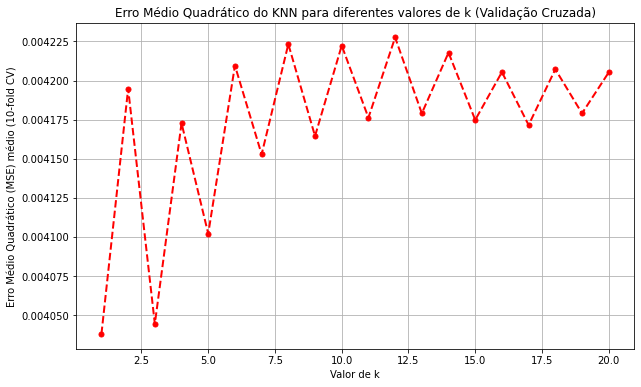

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

k_values = range(1, 21)
cv_errors = []

X_knn = df_onehot.drop('comm_rate', axis=1)
y_knn = df_onehot['comm_rate']


for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn_regressor, X_knn, y_knn, cv=10, scoring='neg_mean_squared_error')  
    cv_errors.append(-np.mean(scores))  

plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_errors, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=5)
plt.title('Erro Médio Quadrático do KNN para diferentes valores de k (Validação Cruzada)')
plt.xlabel('Valor de k')
plt.ylabel('Erro Médio Quadrático (MSE) médio (10-fold CV)')
plt.grid(True)
plt.show()


In [76]:
cv_errors = np.array(cv_errors) 
k_values = np.array(k_values) 

cv_errors_no_k1 = cv_errors[k_values != 1]
k_values_no_k1 = k_values[k_values != 1]

best_k_regressor = k_values_no_k1[np.argmin(cv_errors_no_k1)]
print(f'O melhor valor de k para regressão é: {best_k_regressor}')

O melhor valor de k para regressão é: 3


In [77]:

knn_regressor = KNeighborsRegressor(n_neighbors=3)

X_knn = df_onehot.drop('comm_rate', axis=1).values  
y_knn = df_onehot['comm_rate'].values  

kf = KFold(n_splits=10, shuffle=True, random_state=42)

cv_errors = []
r2_knn = []

start_time = time.time()
for train_index, test_index in kf.split(X_knn):
    X_train, X_test = X_knn[train_index], X_knn[test_index]
    y_train, y_test = y_knn[train_index], y_knn[test_index]

    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    cv_errors.append(mse)
    r2_knn.append(r2)
    
end_time = time.time()  
execution_time = end_time - start_time 
print(f'Tempo de execução do KNN: {execution_time:.4f} segundos')

Tempo de execução do KNN: 2.8387 segundos


In [122]:
print('------KNN-------\n')
mean_cv_error = np.mean(cv_errors)
print(f'Erro Médio Quadrático Médio (MSE) de validação cruzada: {mean_cv_error} \n')

mean_r2 = np.mean(r2_knn)
print(f'R2 (MSE) de validação cruzada: {mean_r2}\n')

print(f'Erros de cada fold: {cv_errors}\n')
print(f'R2 de cada fold: {r2_knn}\n')

------KNN-------

Erro Médio Quadrático Médio (MSE) de validação cruzada: 0.000637905413237987 

R2 (MSE) de validação cruzada: 0.8336987761717893

Erros de cada fold: [0.0006504763747073576, 0.000639132562557528, 0.0005895293330394985, 0.0006512280531344397, 0.0006331123794760109, 0.0006561519370158411, 0.0006360388976317656, 0.0006439766630798428, 0.0006369348924012868, 0.0006424730393362997]

R2 de cada fold: [0.8337513182240155, 0.8287404686472929, 0.8481949320224986, 0.8357715961041061, 0.8349636532974736, 0.8316110364260288, 0.8318527916919889, 0.8316560248735769, 0.8307236157190308, 0.8297223247118809]



In [79]:
from sklearn.tree import DecisionTreeRegressor


X_dt = df_onehot.drop('comm_rate', axis=1).values  
y_dt = df_onehot['comm_rate'].values 

tree_regressor = DecisionTreeRegressor(max_depth=5,  min_samples_split=10, random_state=42)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

dt_errors = []
r2_dt = []

start_time = time.time()
for train_index, test_index in kf.split(X_dt):
    X_train, X_test = X_dt[train_index], X_dt[test_index]
    y_train, y_test = y_dt[train_index], y_dt[test_index]

    tree_regressor.fit(X_train, y_train)
    y_pred = tree_regressor.predict(X_test)
    
    r2_d = r2_score(y_test, y_pred)
    mse_d = mean_squared_error(y_test, y_pred)
    dt_errors.append(mse_d)
    r2_dt.append(r2_d)
    
end_time = time.time()  
execution_time = end_time - start_time 
print(f'Tempo de execução da Árvore de Decisão: {execution_time:.4f} segundos')

Tempo de execução da Árvore de Decisão: 0.6777 segundos


In [80]:
print('------Árvore de Decisão--------\n')
mean_dt_error = np.mean(dt_errors)
print(f'Erro Médio Quadrático Médio (MSE) de validação cruzada: {mean_dt_error:.10f}\n')
print(f'Erros de cada fold: {dt_errors}\n')
mean_r2_d = np.mean(r2_dt)
print(f'R2 de validação cruzada: {mean_r2_d:.10f}\n')
print(f'R2 de cada fold: {r2_dt}\n')

Erro Médio Quadrático Médio (MSE) de validação cruzada: 0.0002822331

Erros de cada fold: [0.0002881528804813066, 0.0002805383546007624, 0.0003077637778032715, 0.000279818483865719, 0.00026724592218390996, 0.00028454273845960595, 0.00026948620397369285, 0.00027326037465284363, 0.0002846701418031996, 0.00028685237056624624]

R2 de validação cruzada: 0.9264321260

R2 de cada fold: [0.9263539178474821, 0.9248280091642778, 0.9207501669686926, 0.9294346385038957, 0.9303357632891597, 0.9269774969504421, 0.9287569470288375, 0.9285661416772615, 0.9243440218269018, 0.9239741563920489]



In [81]:
import time
from sklearn.linear_model import LinearRegression

X_lr = df_onehot.drop('comm_rate', axis=1).values  
y_lr = df_onehot['comm_rate'].values 

linear_regressor = LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state=42)

lr_errors = []
r2_lr = []

start_time = time.time()
for train_index, test_index in kf.split(X_lr):
    X_train, X_test = X_lr[train_index], X_lr[test_index]
    y_train, y_test = y_lr[train_index], y_lr[test_index]

    linear_regressor.fit(X_train, y_train)

    y_pred = linear_regressor.predict(X_test)
    
    r2_l = r2_score(y_test, y_pred)
    mse_l = mean_squared_error(y_test, y_pred)
    
    lr_errors.append(mse_l)
    r2_lr.append(r2_l)
    
end_time = time.time()  
execution_time = end_time - start_time 
print(f'Tempo de execução da Regressão Linear: {execution_time:.4f} segundos')

Tempo de execução da Regressão Linear: 0.2485 segundos


In [82]:
mean_lr_error = np.mean(lr_errors)
print(f'Erro Médio Quadrático Médio (MSE) de validação cruzada: {mean_lr_error:.10f}\n')

print(f'Erros de cada fold: {lr_errors}\n')


mean_r2_lr = np.mean(r2_lr)
print(f'R2 de validação cruzada: {mean_r2_lr:.10f}\n')

print(f'R2 de cada fold: {r2_lr}\n')


Erro Médio Quadrático Médio (MSE) de validação cruzada: 0.0005256148

Erros de cada fold: [0.0005535065504099941, 0.0005057481816117992, 0.000554553232514491, 0.0005169877985889091, 0.0005269201490842537, 0.0005399867314922302, 0.0005025333766125239, 0.0005028771205517737, 0.0005072621705432276, 0.0005457727780530325]

R2 de validação cruzada: 0.8630136484

R2 de cada fold: [0.8585348554719874, 0.8644816402113381, 0.857201352942068, 0.8696246566970591, 0.8626452755815828, 0.8614226356273369, 0.8671471435573814, 0.8685413023059827, 0.8651863681257157, 0.8553512533717954]



In [83]:
from sklearn.ensemble import AdaBoostRegressor

X_ab = df_onehot.drop('comm_rate', axis=1).values  
y_ab = df_onehot['comm_rate'].values 

base_regressor = DecisionTreeRegressor(max_depth=5) 
ada_boost_regressor = AdaBoostRegressor(estimator=base_regressor, n_estimators=100, random_state=42)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

ab_errors = []
r2_ab = []

start_time = time.time()
for train_index, test_index in kf.split(X_ab):
    X_train, X_test = X_ab[train_index], X_ab[test_index]
    y_train, y_test = y_ab[train_index], y_ab[test_index]

    ada_boost_regressor.fit(X_train, y_train)
    
    y_pred = ada_boost_regressor.predict(X_test)
    
    r2_a = r2_score(y_test, y_pred)
    mse_a = mean_squared_error(y_test, y_pred)
    
    ab_errors.append(mse_a)
    r2_ab.append(r2_a)
    
end_time = time.time()  
execution_time = end_time - start_time 
print(f'Tempo de execução do AdaBoost Regressor: {execution_time:.4f} segundos')

Tempo de execução do AdaBoost Regressor: 56.3289 segundos


In [84]:
mean_ab_error = np.mean(ab_errors)
print(f'Erro Médio Quadrático Médio (MSE) de validação cruzada: {mean_ab_error:.10f}\n')

print(f'Erros de cada fold: {ab_errors}\n')

mean_r2_ab = np.mean(r2_ab)
print(f'R2 de validação cruzada: {mean_r2_ab:.10f}\n')

print(f'R2 de cada fold: {r2_ab}\n')

Erro Médio Quadrático Médio (MSE) de validação cruzada: 0.0002565115

Erros de cada fold: [0.0002514173825035309, 0.0002504673899117471, 0.00025477952175103084, 0.000268030482955487, 0.0002493736420821358, 0.00025527759342244263, 0.0002581804746492003, 0.00025933286339561816, 0.00026148107199429945, 0.00025677506543045207]

R2 de validação cruzada: 0.9331317412

R2 de cada fold: [0.9357427724633582, 0.9328857105265066, 0.9343937265694985, 0.932407367589034, 0.9349946136147247, 0.9344878419843408, 0.9317458001176623, 0.9322069764203191, 0.9305069153014462, 0.9319456871550288]



In [116]:
from sklearn.ensemble import StackingRegressor

X_sr = df_onehot.drop('comm_rate', axis=1).values  
y_sr = df_onehot['comm_rate'].values 

base_learners = [
    ('dt', DecisionTreeRegressor(max_depth=5)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('ada', AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5), n_estimators=100, random_state=42))
]


meta_model = LinearRegression()
stacking_regressor = StackingRegressor(estimators=base_learners, final_estimator=meta_model)


kf = KFold(n_splits=10, shuffle=True, random_state=42)

stacking_errors = []
stacking_r2 = []


start_time = time.time()
for train_index, test_index in kf.split(X_sr):
    X_train, X_test = X_sr[train_index], X_sr[test_index]
    y_train, y_test = y_sr[train_index], y_sr[test_index]
    
    stacking_regressor.fit(X_train, y_train)
 
    y_pred = stacking_regressor.predict(X_test)
    
    r2_s = r2_score(y_test, y_pred)
    mse_s = mean_squared_error(y_test, y_pred)
    
    stacking_errors.append(mse_s)
    stacking_r2.append(r2_s)


end_time = time.time()
execution_time = end_time - start_time
print(f'Tempo de execução do Stacking Regressor: {execution_time:.4f} segundos')

Tempo de execução do Stacking Regressor: 759.4867 segundos


12min

In [117]:
mean_stacking_error = np.mean(stacking_errors)
print(f'Erro Médio Quadrático Médio (MSE) de validação cruzada (Stacking): {mean_stacking_error:.10f}\n')

print(f'Erros de cada fold (Stacking): {stacking_errors}\n')

mean_r2_stacking = np.mean(stacking_r2)
print(f'R2 médio de validação cruzada (Stacking): {mean_r2_stacking:.10f}\n')

print(f'R2 de cada fold: {stacking_r2}\n')

Erro Médio Quadrático Médio (MSE) de validação cruzada (Stacking): 0.0001418654

Erros de cada fold (Stacking): [0.00014787231016270114, 0.00013872915006394083, 0.00012489120026631397, 0.00017587205101097727, 0.00012431428909889686, 0.000114841374627399, 0.0001509184364968631, 0.00014753873906997805, 0.00013674629267230223, 0.00015693000914763586]

R2 médio de validação cruzada (Stacking): 0.9630243514

R2 de cada fold: [0.9622068108979692, 0.962826664424923, 0.9678402480017916, 0.9556481234363112, 0.967594416440279, 0.9705281369176983, 0.960102261239612, 0.9614314318450686, 0.9636573246911857, 0.9584080957417183]



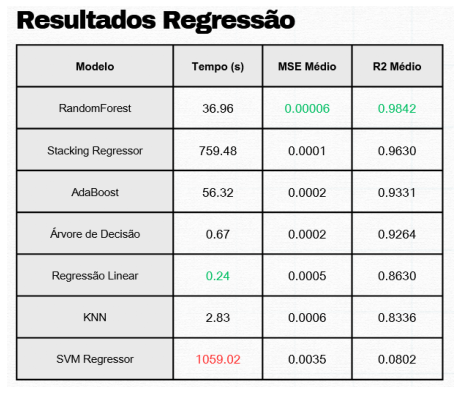

In [197]:
import matplotlib.image as mpimg

plt.figure(figsize=(9, 7)) 
img = mpimg.imread('./resul_regressao.PNG')
plt.imshow(img)
plt.axis('off') 
plt.show()

In [85]:
df_onehot

,zip,eiaid,utility_name,state,ownership,comm_rate,ind_rate,res_rate,rotulos,service_type_Bundled,service_type_Delivery
0,85321,176,9,3,1,0.103993,-1.367465,-0.347778,2,1,0
1,36560,195,11,1,1,0.140915,-0.081439,0.253132,1,1,0
2,36513,195,11,1,1,0.140915,-0.081439,0.253132,1,1,0
3,36280,195,11,1,1,0.140915,-0.081439,0.253132,1,1,0
4,35473,195,11,1,1,0.140915,-0.081439,0.253132,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
80137,76540,55982,645,43,0,0.129482,0.113323,-0.237926,1,1,0
80138,76703,55982,645,43,0,0.129482,0.113323,-0.237926,1,1,0
80139,76702,55982,645,43,0,0.129482,0.113323,-0.237926,1,1,0
80140,76597,55982,645,43,0,0.129482,0.113323,-0.237926,1,1,0


In [86]:
df_class = df_unido.copy()

In [87]:
df_class['service_type'] = label_encoder_service.inverse_transform(df_class['service_type'])

In [88]:
df_class = pd.get_dummies(df_class, columns=['service_type'])

<AxesSubplot:>

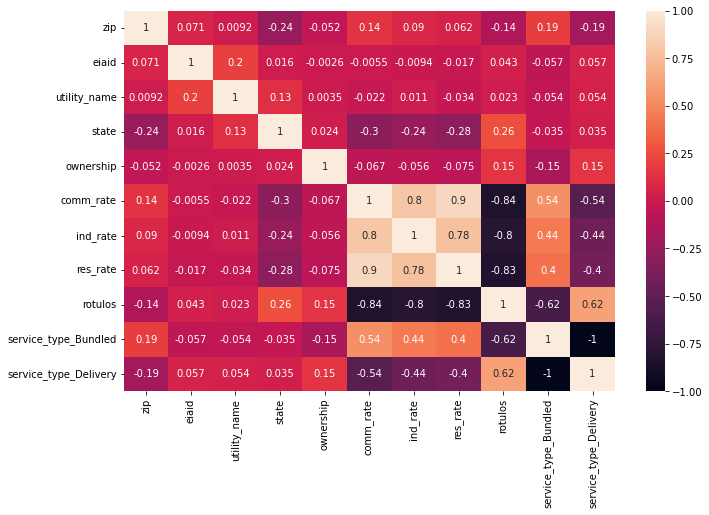

In [149]:
plt.figure(figsize=(11, 7))
sns.heatmap(df_class.corr(), annot=True)

In [89]:
df_class

,zip,eiaid,utility_name,state,ownership,comm_rate,ind_rate,res_rate,rotulos,service_type_Bundled,service_type_Delivery
0,85321,176,9,3,1,-0.223070,-1.367465,-0.347778,2,1,0
1,36560,195,11,1,1,0.372985,-0.081439,0.253132,1,1,0
2,36513,195,11,1,1,0.372985,-0.081439,0.253132,1,1,0
3,36280,195,11,1,1,0.372985,-0.081439,0.253132,1,1,0
4,35473,195,11,1,1,0.372985,-0.081439,0.253132,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
80137,76540,55982,645,43,0,0.188413,0.113323,-0.237926,1,1,0
80138,76703,55982,645,43,0,0.188413,0.113323,-0.237926,1,1,0
80139,76702,55982,645,43,0,0.188413,0.113323,-0.237926,1,1,0
80140,76597,55982,645,43,0,0.188413,0.113323,-0.237926,1,1,0


In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, classification_report


X_dtc = df_class.drop('rotulos', axis=1).values  
y_dtc = df_class['rotulos'].values 

tree_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

dtc_accuracies = []
dtc_precision = []
dtc_f1_score = []

start_time = time.time()
for train_index, test_index in kf.split(X_dtc):
    X_train, X_test = X_dtc[train_index], X_dtc[test_index]
    y_train, y_test = y_dtc[train_index], y_dtc[test_index]

    tree_classifier.fit(X_train, y_train)
    y_pred = tree_classifier.predict(X_test)
    
    accuracy_dt = accuracy_score(y_test, y_pred)   
    prec_dt = precision_score(y_test, y_pred, average='weighted')  
    f1_dt = f1_score(y_test, y_pred, average='weighted')  
    
    dtc_accuracies.append(accuracy_dt)
    dtc_precision.append(prec_dt)
    dtc_f1_score.append(f1_dt)

end_time = time.time()  
execution_time = end_time - start_time 
print(f'Tempo de execução da Árvore de Decisão: {execution_time:.4f} segundos')

Tempo de execução da Árvore de Decisão: 0.8533 segundos


In [91]:
print("-------- Árvore de Decisão Classificatória--------\n")
mean_accuracy = np.mean(dtc_accuracies)
mean_precision = np.mean(dtc_precision)
mean_f1_score = np.mean(dtc_f1_score)
print(f'Acurácia média de validação cruzada: {mean_accuracy:.10f}\n')
print(f'Precisão média de validação cruzada: {mean_precision:.10f}\n')
print(f'F1-Score médio de validação cruzada: {mean_f1_score:.10f}\n')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de confusão do último fold: \n', conf_matrix)

print(f'\nAcurácia de cada fold: {dtc_accuracies}\n')
print(f'Precisão de cada fold: {dtc_precision}\n')
print(f'F1-Score de cada fold: {dtc_f1_score}\n')

class_report = classification_report(y_test, y_pred)
print(class_report)

-------- Árvore de Decisão Classificatória--------

Acurácia média de validação cruzada: 0.9895673321

Precisão média de validação cruzada: 0.9896473041

F1-Score médio de validação cruzada: 0.9894971434

Matriz de confusão do último fold: 
 [[ 524    0    0]
 [   0 5668    9]
 [   0   73 1739]]

Acurácia de cada fold: [0.9898926877963564, 0.9911405041177939, 0.9886448714749189, 0.9890178460002496, 0.9900162236365906, 0.9877698739548234, 0.9893922376138774, 0.9900162236365906, 0.9900162236365906, 0.9897666292275054]

Precisão de cada fold: [0.9899520062392159, 0.9911834674009643, 0.98875813530077, 0.9891203336476648, 0.9900789121383855, 0.9878842328255576, 0.9894784042529093, 0.9900988966804505, 0.9900915873908879, 0.9898270655254222]

F1-Score de cada fold: [0.9898340334300674, 0.9910916807621656, 0.988574846635492, 0.9889349539486979, 0.9899523796614794, 0.9876729766288398, 0.9893129501015073, 0.9899457647263438, 0.9899485243514349, 0.9897033238393795]

              precision    rec

In [92]:
cluster_aliases

{0: 'Taxas Altas', 1: 'Taxas Médias', 2: 'Taxas Baixas'}

In [93]:
print("Antes do Undersampling:")
print("0 - Taxas Altas: ", sum(y_test == 0))
print("1 - Taxas Médias: ",sum(y_test == 1))
print("2 - Taxas Baixas: ",sum(y_test == 2))

Antes do Undersampling:
0 - Taxas Altas:  524
1 - Taxas Médias:  5677
2 - Taxas Baixas:  1812


In [95]:
from imblearn.under_sampling import NearMiss

X_dtc = df_class.drop('rotulos', axis=1).values  
y_dtc = df_class['rotulos'].values 

tree_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)


near_miss = NearMiss()  

kf = KFold(n_splits=10, shuffle=True, random_state=42)


dtc_accuracies = []
dtc_precision = []
dtc_f1_score = []

start_time = time.time()
for train_index, test_index in kf.split(X_dtc):
    X_train, X_test = X_dtc[train_index], X_dtc[test_index]
    y_train, y_test = y_dtc[train_index], y_dtc[test_index]

    X_train_res, y_train_res = near_miss.fit_resample(X_train, y_train)

    tree_classifier.fit(X_train_res, y_train_res)
    
    y_pred = tree_classifier.predict(X_test)

    accuracy_dt = accuracy_score(y_test, y_pred)   
    prec_dt = precision_score(y_test, y_pred, average='weighted')  
    f1_dt = f1_score(y_test, y_pred, average='weighted')  

    dtc_accuracies.append(accuracy_dt)
    dtc_precision.append(prec_dt)
    dtc_f1_score.append(f1_dt)

end_time = time.time()  
execution_time = end_time - start_time 
print(f'Tempo de execução da Árvore de Decisão - Undersampling: {execution_time:.4f} segundos')

Tempo de execução da Árvore de Decisão - Undersampling: 6.1768 segundos


In [96]:
print("-------- Árvore de Decisão Classificatória com Undersampling--------\n")
mean_accuracy = np.mean(dtc_accuracies)
mean_precision = np.mean(dtc_precision)
mean_f1_score = np.mean(dtc_f1_score)
print(f'Acurácia média: {mean_accuracy:.10f}\n')
print(f'Precisão média: {mean_precision:.10f}\n')
print(f'F1-Score médio: {mean_f1_score:.10f}\n')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de confusão do último fold: \n', conf_matrix)

print(f'\nAcurácia de cada fold: {dtc_accuracies}\n')
print(f'Precisão de cada fold: {dtc_precision}\n')
print(f'F1-Score de cada fold: {dtc_f1_score}\n')

class_report = classification_report(y_test, y_pred)
print(class_report)

-------- Árvore de Decisão Classificatória com Undersampling--------

Acurácia média: 0.9481862983

Precisão média: 0.9564788841

F1-Score médio: 0.9494225906

Matriz de confusão do último fold: 
 [[ 524    0    0]
 [  21 5383  273]
 [   0    0 1812]]

Acurácia de cada fold: [0.9339905165959571, 0.9624407287247317, 0.935487896181682, 0.9402221390240859, 0.9532010482965182, 0.9332334955696993, 0.956196181205541, 0.9510794958192936, 0.9527018594783477, 0.9633096218644702]

Precisão de cada fold: [0.9460913406401231, 0.9673757362767169, 0.9472976438414535, 0.9502752751113543, 0.9597240858184499, 0.9455387292132538, 0.9626976078119579, 0.9583202264698163, 0.959596674932218, 0.967871521034935]

F1-Score de cada fold: [0.9357019984651568, 0.963260293872222, 0.9372277287544994, 0.9416596733809866, 0.9541655371903134, 0.9349604296541203, 0.9572808668699999, 0.952169659252138, 0.9537586565244393, 0.964041061807219]

              precision    recall  f1-score   support

           0       0.96 

In [97]:
print("Após o Undersampling:")
print("0 - Taxas Altas: ", sum(y_train_res == 0))
print("1 - Taxas Médias: ",sum(y_train_res == 1))
print("2 - Taxas Baixas: ",sum(y_train_res == 2))

Após o Undersampling:
0 - Taxas Altas:  4981
1 - Taxas Médias:  4981
2 - Taxas Baixas:  4981


In [98]:
from imblearn.over_sampling import SMOTE

X_dtc = df_class.drop('rotulos', axis=1).values  
y_dtc = df_class['rotulos'].values 


tree_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

smote = SMOTE(random_state=42)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

dtc_accuracies = []
dtc_precision = []
dtc_f1_score = []

start_time = time.time()
for train_index, test_index in kf.split(X_dtc):
    X_train, X_test = X_dtc[train_index], X_dtc[test_index]
    y_train, y_test = y_dtc[train_index], y_dtc[test_index]


    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
    

    tree_classifier.fit(X_train_res, y_train_res)

    y_pred = tree_classifier.predict(X_test)

    accuracy_dt = accuracy_score(y_test, y_pred)   
    prec_dt = precision_score(y_test, y_pred, average='weighted')  
    f1_dt = f1_score(y_test, y_pred, average='weighted')  
    
    dtc_accuracies.append(accuracy_dt)
    dtc_precision.append(prec_dt)
    dtc_f1_score.append(f1_dt)

end_time = time.time()  
execution_time = end_time - start_time 
print(f'Tempo de execução da Árvore de Decisão: {execution_time:.4f} segundos')

Tempo de execução da Árvore de Decisão: 4.0205 segundos


In [99]:
print("-------- Árvore de Decisão Classificatória com Oversampling--------\n")
mean_accuracy = np.mean(dtc_accuracies)
mean_precision = np.mean(dtc_precision)
mean_f1_score = np.mean(dtc_f1_score)
print(f'Acurácia média: {mean_accuracy:.10f}\n')
print(f'Precisão média: {mean_precision:.10f}\n')
print(f'F1-Score médio: {mean_f1_score:.10f}\n')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de confusão do último fold: \n', conf_matrix)

print(f'\nAcurácia de cada fold: {dtc_accuracies}\n')
print(f'Precisão de cada fold: {dtc_precision}\n')
print(f'F1-Score de cada fold: {dtc_f1_score}\n')

class_report = classification_report(y_test, y_pred)
print(class_report)

-------- Árvore de Decisão Classificatória com Oversampling--------

Acurácia média: 0.9937978203

Precisão média: 0.9938958354

F1-Score médio: 0.9938185762

Matriz de confusão do último fold: 
 [[ 524    0    0]
 [   0 5628   49]
 [   0    2 1810]]

Acurácia de cada fold: [0.9943848265535313, 0.9927626653356626, 0.9935113551285251, 0.9946337202046674, 0.9933857481592412, 0.9945089230001248, 0.9936353425683264, 0.9917633845001872, 0.995756895045551, 0.9936353425683264]

Precisão de cada fold: [0.9944451784335492, 0.9928913155632607, 0.9935840272621062, 0.9946666964790573, 0.9935033353081574, 0.9945661532434679, 0.9937273689076757, 0.9919821531910678, 0.9958042628250795, 0.9937878624503943]

F1-Score de cada fold: [0.9943988039861246, 0.9927894804618591, 0.993529613727568, 0.9946417428662898, 0.9934103545537926, 0.9945223418958926, 0.9936563814852596, 0.9918069649010012, 0.995767219841774, 0.9936628580448618]

              precision    recall  f1-score   support

           0       1.

In [100]:
print("Após o Oversampling:")
print("0 - Taxas Altas: ", sum(y_train_res == 0))
print("1 - Taxas Médias: ",sum(y_train_res == 1))
print("2 - Taxas Baixas: ",sum(y_train_res == 2))

Após o Oversampling:
0 - Taxas Altas:  51348
1 - Taxas Médias:  51348
2 - Taxas Baixas:  51348


In [101]:
from sklearn.naive_bayes import GaussianNB

X_nb = df_class.drop('rotulos', axis=1).values  
y_nb = df_class['rotulos'].values 

naive_bayes_classifier = GaussianNB()

smote = SMOTE(random_state=42)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

nb_accuracies = []
nb_precision = []
nb_f1_score = []

start_time = time.time()
for train_index, test_index in kf.split(X_nb):
    X_train, X_test = X_nb[train_index], X_nb[test_index]
    y_train, y_test = y_nb[train_index], y_nb[test_index]

    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
    
    naive_bayes_classifier.fit(X_train_res, y_train_res)
    
    y_pred = naive_bayes_classifier.predict(X_test)
    
    accuracy_nb = accuracy_score(y_test, y_pred)   
    prec_nb = precision_score(y_test, y_pred, average='weighted')  
    f1_nb = f1_score(y_test, y_pred, average='weighted')  
    
    nb_accuracies.append(accuracy_nb)
    nb_precision.append(prec_nb)
    nb_f1_score.append(f1_nb)

end_time = time.time()  
execution_time = end_time - start_time 
print(f'Tempo de execução do Naive Bayes: {execution_time:.4f} segundos')

Tempo de execução do Naive Bayes: 2.8427 segundos


In [102]:
print("-------- Naive Bayes--------\n")
mean_accuracy_nb = np.mean(nb_accuracies)
mean_precision_nb = np.mean(nb_precision)
mean_f1_score_nb = np.mean(nb_f1_score)
print(f'Acurácia média: {mean_accuracy_nb:.10f}\n')
print(f'Precisão média: {mean_precision_nb:.10f}\n')
print(f'F1-Score médio: {mean_f1_score_nb:.10f}\n')

conf_matrix_nb = confusion_matrix(y_test, y_pred)
print('Matriz de confusão do último fold: \n', conf_matrix_nb)

print(f'\nAcurácia de cada fold: {nb_accuracies}\n')
print(f'Precisão de cada fold: {nb_precision}\n')
print(f'F1-Score de cada fold: {nb_f1_score}\n')

class_report_nb = classification_report(y_test, y_pred)
print(class_report_nb)

-------- Naive Bayes--------

Acurácia média: 0.9438058915

Precisão média: 0.9435627229

F1-Score médio: 0.9435862012

Matriz de confusão do último fold: 
 [[ 514   10    0]
 [  32 5463  182]
 [   0  228 1584]]

Acurácia de cada fold: [0.942475667581732, 0.947466932867482, 0.943973047167457, 0.943092474728566, 0.9409709222513416, 0.9419692998876825, 0.9432172719331087, 0.9444652439785349, 0.9468363908648446, 0.9435916635467365]

Precisão de cada fold: [0.9423502275366686, 0.9472951334297651, 0.9435391941204733, 0.9427971600024319, 0.9405102060580565, 0.9417607747564205, 0.9432025322103943, 0.9441368340990611, 0.9467491752897493, 0.9432859915042794]

F1-Score de cada fold: [0.9422854418104527, 0.9473012144558062, 0.9436752621020243, 0.9428757089784284, 0.9405876899895447, 0.9417355475941297, 0.9430867106353724, 0.9442067664615909, 0.9467315390448063, 0.9433761306069243]

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       524
       

In [103]:
df_class_sample = df_class.sample(frac=0.1, random_state=42)

In [104]:
from sklearn.linear_model import LogisticRegression

X_lr = df_class.drop('rotulos', axis=1).values  
y_lr = df_class['rotulos'].values 

log_reg_classifier = LogisticRegression(max_iter=10000, solver='newton-cg', random_state=42)

smote = SMOTE(random_state=42)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

lr_accuracies = []
lr_precision = []
lr_f1_score = []

start_time = time.time()
for train_index, test_index in kf.split(X_lr):
    X_train, X_test = X_lr[train_index], X_lr[test_index]
    y_train, y_test = y_lr[train_index], y_lr[test_index]
    
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    log_reg_classifier.fit(X_train_res, y_train_res)
    
    y_pred = log_reg_classifier.predict(X_test)
    
    accuracy_lr = accuracy_score(y_test, y_pred)   
    prec_lr = precision_score(y_test, y_pred, average='weighted')  
    f1_lr = f1_score(y_test, y_pred, average='weighted')  

    lr_accuracies.append(accuracy_lr)
    lr_precision.append(prec_lr)
    lr_f1_score.append(f1_lr)

end_time = time.time()  
execution_time = end_time - start_time 
print(f'Tempo de execução da Regressão Logística: {execution_time:.4f} segundos')

Tempo de execução da Regressão Logística: 466.7218 segundos


7.7 min

In [106]:
print("--------Regressão Logística--------\n")
mean_accuracy_lr = np.mean(lr_accuracies)
mean_precision_lr = np.mean(lr_precision)
mean_f1_score_lr = np.mean(lr_f1_score)
print(f'Acurácia média: {mean_accuracy_lr:.10f}\n')
print(f'Precisão média: {mean_precision_lr:.10f}\n')
print(f'F1-Score médio: {mean_f1_score_lr:.10f}\n')

conf_matrix_lr = confusion_matrix(y_test, y_pred)
print('Matriz de confusão do último fold: \n', conf_matrix_lr)

print(f'\nAcurácia de cada fold: {lr_accuracies}\n')
print(f'Precisão de cada fold: {lr_precision}\n')
print(f'F1-Score de cada fold: {lr_f1_score}\n')

class_report_lr = classification_report(y_test, y_pred)
print(class_report_lr)

--------Regressão Logística--------

Acurácia média: 0.9974292710

Precisão média: 0.9974574301

F1-Score médio: 0.9974339439

Matriz de confusão do último fold: 
 [[ 524    0    0]
 [   1 5654   22]
 [   0    0 1812]]

Acurácia de cada fold: [0.9972548040928375, 0.9977539306214125, 0.997504367357125, 0.9982528391364034, 0.9976288531136902, 0.9968800698864345, 0.9975040559091476, 0.9965056782728067, 0.9978784475227754, 0.9971296642955197]

Precisão de cada fold: [0.9972849579074459, 0.9977747615301794, 0.9975285137006407, 0.9982637084354749, 0.9976516645598137, 0.9969172794986816, 0.9975301517190338, 0.9965611436970478, 0.9978992831045853, 0.9971628364903034]

F1-Score de cada fold: [0.9972597108760402, 0.9977574035843234, 0.9975082478039672, 0.9982544815699054, 0.9976325986771353, 0.9968859649120724, 0.997508443850349, 0.9965153777961461, 0.9978821157891343, 0.9971350939363312]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       52

In [107]:
from sklearn.ensemble import BaggingClassifier

X_bgg = df_class.drop('rotulos', axis=1).values  
y_bgg = df_class['rotulos'].values 

decision_tree = DecisionTreeClassifier(random_state=42)
bagging_classifier = BaggingClassifier(estimator=decision_tree, n_estimators=10, random_state=42)
smote = SMOTE(random_state=42)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

bgg_accuracies = []
bgg_precision = []
bgg_f1_score = []

start_time = time.time()
for train_index, test_index in kf.split(X_bgg):
    X_train, X_test = X_bgg[train_index], X_bgg[test_index]
    y_train, y_test = y_bgg[train_index], y_bgg[test_index]

    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
    
    bagging_classifier.fit(X_train_res, y_train_res)

    y_pred = bagging_classifier.predict(X_test)
    

    accuracy_bgg = accuracy_score(y_test, y_pred)   
    prec_bgg = precision_score(y_test, y_pred, average='weighted')  
    f1_bgg = f1_score(y_test, y_pred, average='weighted')  
    
    bgg_accuracies.append(accuracy_bgg)
    bgg_precision.append(prec_bgg)
    bgg_f1_score.append(f1_bgg)

end_time = time.time()  
execution_time = end_time - start_time 
print(f'Tempo de execução do modelo de Bagging com Árvore de Decisão {execution_time:.4f} segundos')

Tempo de execução do modelo de Bagging com Árvore de Decisão 16.3064 segundos


In [108]:
mean_accuracy = np.mean(bgg_accuracies)
mean_precision = np.mean(bgg_precision)
mean_f1_score = np.mean(bgg_f1_score)

print("--------Árvore de Decisão com Bagging--------\n")
print(f'Acurácia média: {mean_accuracy:.10f}\n')
print(f'Precisão média: {mean_precision:.10f}\n')
print(f'F1-Score médio: {mean_f1_score:.10f}\n')

conf_matrix_bgg = confusion_matrix(y_test, y_pred)
print('Matriz de confusão do último fold: \n', conf_matrix_bgg)

print(f'\nAcurácia de cada fold: {bgg_accuracies}\n')
print(f'Precisão de cada fold: {bgg_precision}\n')
print(f'F1-Score de cada fold: {bgg_f1_score}\n')

class_report_bgg = classification_report(y_test, y_pred)
print(class_report_bgg)

--------Árvore de Decisão com Bagging--------

Acurácia média: 0.9999001669

Precisão média: 0.9999002410

F1-Score médio: 0.9999001763

Matriz de confusão do último fold: 
 [[ 524    0    0]
 [   0 5676    1]
 [   0    0 1812]]

Acurácia de cada fold: [0.9998752183678562, 0.9998752183678562, 0.9998752183678562, 1.0, 0.9998752027954574, 1.0, 1.0, 0.9997504055909148, 0.9998752027954574, 0.9998752027954574]

Precisão de cada fold: [0.9998752404257725, 0.9998752400576932, 0.99987529095752, 1.0, 0.9998752247590627, 1.0, 1.0, 0.9997507060036278, 0.9998754360612603, 0.9998752716300986]

F1-Score de cada fold: [0.9998752067189118, 0.9998752057951664, 0.9998752310625156, 1.0, 0.9998751906750434, 1.0, 1.0, 0.9997504589758237, 0.9998752557541435, 0.9998752145126435]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       524
           1       1.00      1.00      1.00      5677
           2       1.00      1.00      1.00      1812

    accuracy  

In [114]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix


X_svm = df_class_sample.drop('rotulos', axis=1).values
y_svm = df_class_sample['rotulos'].values

svm_model = SVC(random_state=42)  
smote = SMOTE(random_state=42)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

svm_accuracy = []
svm_precision = []
svm_f1_score = []


start_time = time.time()
for train_index, test_index in kf.split(X_svm):
    X_train, X_test = X_svm[train_index], X_svm[test_index]
    y_train, y_test = y_svm[train_index], y_svm[test_index]

    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
    svm_model.fit(X_train_res, y_train_res)
    
    y_pred = svm_model.predict(X_test)
 
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')  
    f1 = f1_score(y_test, y_pred, average='weighted')  
    
    
    svm_accuracy.append(acc)
    svm_precision.append(prec)
    svm_f1_score.append(f1)

end_time = time.time()
execution_time = end_time - start_time
print(f'Tempo de execução do SVM: {execution_time:.4f} segundos\n')

mean_accuracy = np.mean(svm_accuracy)
mean_precision = np.mean(svm_precision)
mean_f1_score = np.mean(svm_f1_score)
print(f'Acurácia média de validação cruzada: {mean_accuracy:.10f}')
print(f'Precisão média de validação cruzada: {mean_precision:.10f}')
print(f'F1-Score médio de validação cruzada: {mean_f1_score:.10f}\n')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Matriz de confusão do último fold: {conf_matrix}\n')

print(f'Acurácia de cada fold: {svm_accuracy}\n')
print(f'Precisão de cada fold: {svm_precision}\n')
print(f'F1-Score de cada fold: {svm_f1_score}\n')

Tempo de execução do SVM: 138.2640 segundos
Acurácia média de validação cruzada: 0.5987760001
Precisão média de validação cruzada: 0.7100202626
F1-Score médio de validação cruzada: 0.6231944104

Matriz de confusão do último fold: [[ 46   1   0]
 [ 82 327 146]
 [ 26  63 110]]

Acurácia de cada fold: [0.6109725685785536, 0.6172069825436409, 0.5760598503740648, 0.6042446941323346, 0.5892634207240949, 0.6054931335830213, 0.599250936329588, 0.6092384519350812, 0.5730337078651685, 0.602996254681648]

Precisão de cada fold: [0.7152452961815681, 0.7263183127987727, 0.7134954862796532, 0.6996958188994443, 0.7108968660216456, 0.6922949557958982, 0.699659755316928, 0.7328435061565834, 0.7060038348045742, 0.703748793719276]

F1-Score de cada fold: [0.6338741092220408, 0.6413338214236934, 0.607704052212259, 0.6258896179883404, 0.6149069443002884, 0.6236200677561404, 0.6200234876573918, 0.6381292191180283, 0.6004684822827229, 0.6259943018598136]



In [109]:
from sklearn.ensemble import AdaBoostClassifier

X_ada = df_class.drop('rotulos', axis=1).values  
y_ada = df_class['rotulos'].values 

decision_tree_shalow = DecisionTreeClassifier(max_depth=1, random_state=42) 
adaboost_classifier = AdaBoostClassifier(estimator=decision_tree_shalow, algorithm='SAMME', n_estimators=50, random_state=42)
smote = SMOTE(random_state=42)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

adaboost_accuracies = []
adaboost_precision = []
adaboost_f1_score = []

start_time = time.time()
for train_index, test_index in kf.split(X_ada):
    X_train, X_test = X_ada[train_index], X_ada[test_index]
    y_train, y_test = y_ada[train_index], y_ada[test_index]

    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
    adaboost_classifier.fit(X_train_res, y_train_res)
    y_pred = adaboost_classifier.predict(X_test)

    accuracy_adaboost = accuracy_score(y_test, y_pred)   
    prec_adaboost = precision_score(y_test, y_pred, average='weighted')  
    f1_adaboost = f1_score(y_test, y_pred, average='weighted')  
    
    adaboost_accuracies.append(accuracy_adaboost)
    adaboost_precision.append(prec_adaboost)
    adaboost_f1_score.append(f1_adaboost)

end_time = time.time()  
execution_time = end_time - start_time 
print(f'Tempo de execução do modelo AdaBoost: {execution_time:.4f} segundos')

Tempo de execução do modelo AdaBoost: 30.9137 segundos


In [110]:
mean_accuracy_ada = np.mean(adaboost_accuracies)
mean_precision_ada = np.mean(adaboost_precision)
mean_f1_score_ada = np.mean(adaboost_f1_score)

print("--------AdaBoost com Árvore de Decisão--------\n")
print(f'Acurácia média: {mean_accuracy_ada:.10f}\n')
print(f'Precisão média: {mean_precision_ada:.10f}\n')
print(f'F1-Score médio: {mean_f1_score_ada:.10f}\n')

conf_matrix_adaboost = confusion_matrix(y_test, y_pred)
print('Matriz de confusão do último fold: \n', conf_matrix_adaboost)

print(f'\nAcurácia de cada fold: {adaboost_accuracies}\n')
print(f'Precisão de cada fold: {adaboost_precision}\n')
print(f'F1-Score de cada fold: {adaboost_f1_score}\n')

class_report_adaboost = classification_report(y_test, y_pred)
print(class_report_adaboost)

--------AdaBoost com Árvore de Decisão--------

Acurácia média: 0.9909775436

Precisão média: 0.9911695762

F1-Score médio: 0.9910167651

Matriz de confusão do último fold: 
 [[ 522    2    0]
 [   0 5654   23]
 [   0   27 1785]]

Acurácia de cada fold: [0.9905165959570751, 0.9895183428999251, 0.9893935612677813, 0.989891426432048, 0.9870210907275677, 0.9940097341819544, 0.9903906152502184, 0.9930113565456133, 0.9925121677274429, 0.9935105453637838]

Precisão de cada fold: [0.9908344515315464, 0.9897606360712872, 0.9896347635905844, 0.9901693355962219, 0.9875525849856611, 0.994069375872658, 0.9905137216658992, 0.9930453992160551, 0.9926074775009999, 0.9935080160583776]

F1-Score de cada fold: [0.9905749703936945, 0.9895739797475929, 0.9894394511989196, 0.989941914249217, 0.9871253414932977, 0.9940243729773374, 0.9904242746952953, 0.9930225017963156, 0.9925322710147039, 0.9935085730736409]

              precision    recall  f1-score   support

           0       1.00      1.00      1.0

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier

X_stc = df_class.drop('rotulos', axis=1).values  
y_stc = df_class['rotulos'].values 

decision_tree = DecisionTreeClassifier(random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)  
logistic_regression = LogisticRegression(max_iter=10000, solver='newton-cg', random_state=42)

meta_classifier = LogisticRegression(random_state=42)

stacking_classifier = StackingClassifier(
    estimators=[('dt', decision_tree), ('knn', knn_classifier), ('lr', logistic_regression)],
    final_estimator=meta_classifier
)

smote = SMOTE(random_state=42)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

stacking_accuracies = []
stacking_precision = []
stacking_f1_score = []

start_time = time.time()
for train_index, test_index in kf.split(X_stc):
    X_train, X_test = X_stc[train_index], X_stc[test_index]
    y_train, y_test = y_stc[train_index], y_stc[test_index]

    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
    
    stacking_classifier.fit(X_train_res, y_train_res)
    
    y_pred = stacking_classifier.predict(X_test)

    accuracy_stacking = accuracy_score(y_test, y_pred)   
    prec_stacking = precision_score(y_test, y_pred, average='weighted')  
    f1_stacking = f1_score(y_test, y_pred, average='weighted')  
    
    stacking_accuracies.append(accuracy_stacking)
    stacking_precision.append(prec_stacking)
    stacking_f1_score.append(f1_stacking)

end_time = time.time()  
execution_time = end_time - start_time 
print(f'Tempo de execução do modelo Stacking: {execution_time:.4f} segundos')

Tempo de execução do modelo Stacking: 2563.9604 segundos


42.7 min

In [112]:
mean_accuracy_stc = np.mean(stacking_accuracies)
mean_precision_stc = np.mean(stacking_precision)
mean_f1_score_stc = np.mean(stacking_f1_score)

print("--------Stacking Classifier--------\n")
print(f'Acurácia média: {mean_accuracy_stc:.10f}\n')
print(f'Precisão média: {mean_precision_stc:.10f}\n')
print(f'F1-Score médio: {mean_f1_score_stc:.10f}\n')

conf_matrix_stacking = confusion_matrix(y_test, y_pred)
print('Matriz de confusão do último fold: \n', conf_matrix_stacking)

print(f'\nAcurácia de cada fold: {stacking_accuracies}\n')
print(f'Precisão de cada fold: {stacking_precision}\n')
print(f'F1-Score de cada fold: {stacking_f1_score}\n')

class_report_stacking = classification_report(y_test, y_pred)
print(class_report_stacking)

--------Stacking Classifier--------

Acurácia média: 0.9999251263

Precisão média: 0.9999251483

F1-Score médio: 0.9999250991

Matriz de confusão do último fold: 
 [[ 524    0    0]
 [   0 5677    0]
 [   0    0 1812]]

Acurácia de cada fold: [0.9998752183678562, 0.9997504367357125, 1.0, 0.9997504055909148, 0.9998752027954574, 1.0, 1.0, 1.0, 1.0, 1.0]

Precisão de cada fold: [0.9998752404257725, 0.9997505234799823, 1.0, 0.999750493911654, 0.9998752247590627, 1.0, 1.0, 1.0, 1.0, 1.0]

F1-Score de cada fold: [0.9998752067189118, 0.9997503812917148, 1.0, 0.9997502121357935, 0.9998751906750434, 1.0, 1.0, 1.0, 1.0, 1.0]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       524
           1       1.00      1.00      1.00      5677
           2       1.00      1.00      1.00      1812

    accuracy                           1.00      8013
   macro avg       1.00      1.00      1.00      8013
weighted avg       1.00      1.00      1.00      8

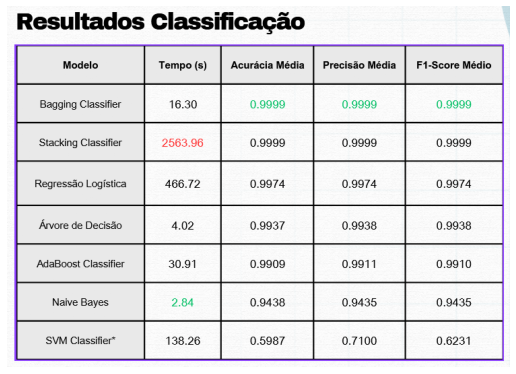

In [198]:
plt.figure(figsize=(9, 7)) 
img = mpimg.imread('./resul_classificacao.PNG')
plt.imshow(img)
plt.axis('off') 
plt.show()